In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Using MPG dataset from sklearn for practicing Multiple Linear Regression 

In [37]:
df = sns.load_dataset("mpg")

In [39]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
len(df["name"].unique()) # Calculates the Total unique values in the name column
df["name"].count() # Total Number of rows in the name column 

398

In [43]:
df.drop(columns = "name",inplace=True) # Name columns has nearly same number of unique values as total values in it.
# So better we drop this ccolumn instead of encoding it 

## Encode the Origin Column

In [46]:
len(df["origin"].unique()) # Total Number of unique values in the origin column
df["origin"].count() # Total number of rows in the dataset


398

## Enconding values of a column

In [49]:
# Since the total number unique values and total number of rows in the dataset are too far from eachother 
## We can try encoding the values in origin column of the df
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [51]:
# Define custom mapping
origin_mapping = {'usa': "1", 'japan': "2", 'europe': "3"}

# Apply mapping to the 'origin' column
df['origin'] = df['origin'].map(origin_mapping)

# Display the first 5 rows
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Convert the datatype of origin Column from Object to Float

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [56]:
df["origin"] = df["origin"].astype(int)


In [58]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [60]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

# Determine if the Data follows a Linear or Non Linear relation

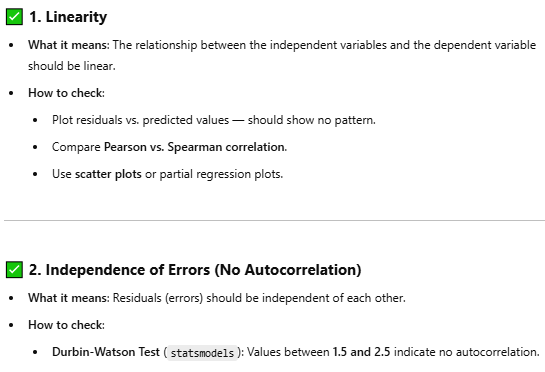 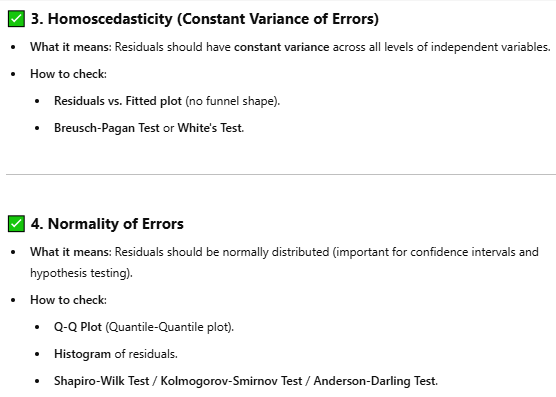
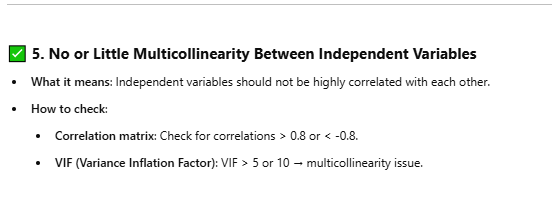

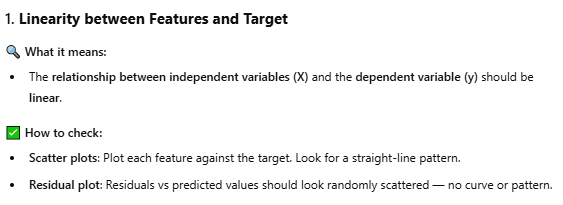

In [268]:
## Plotting a sctter plot 

In [270]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

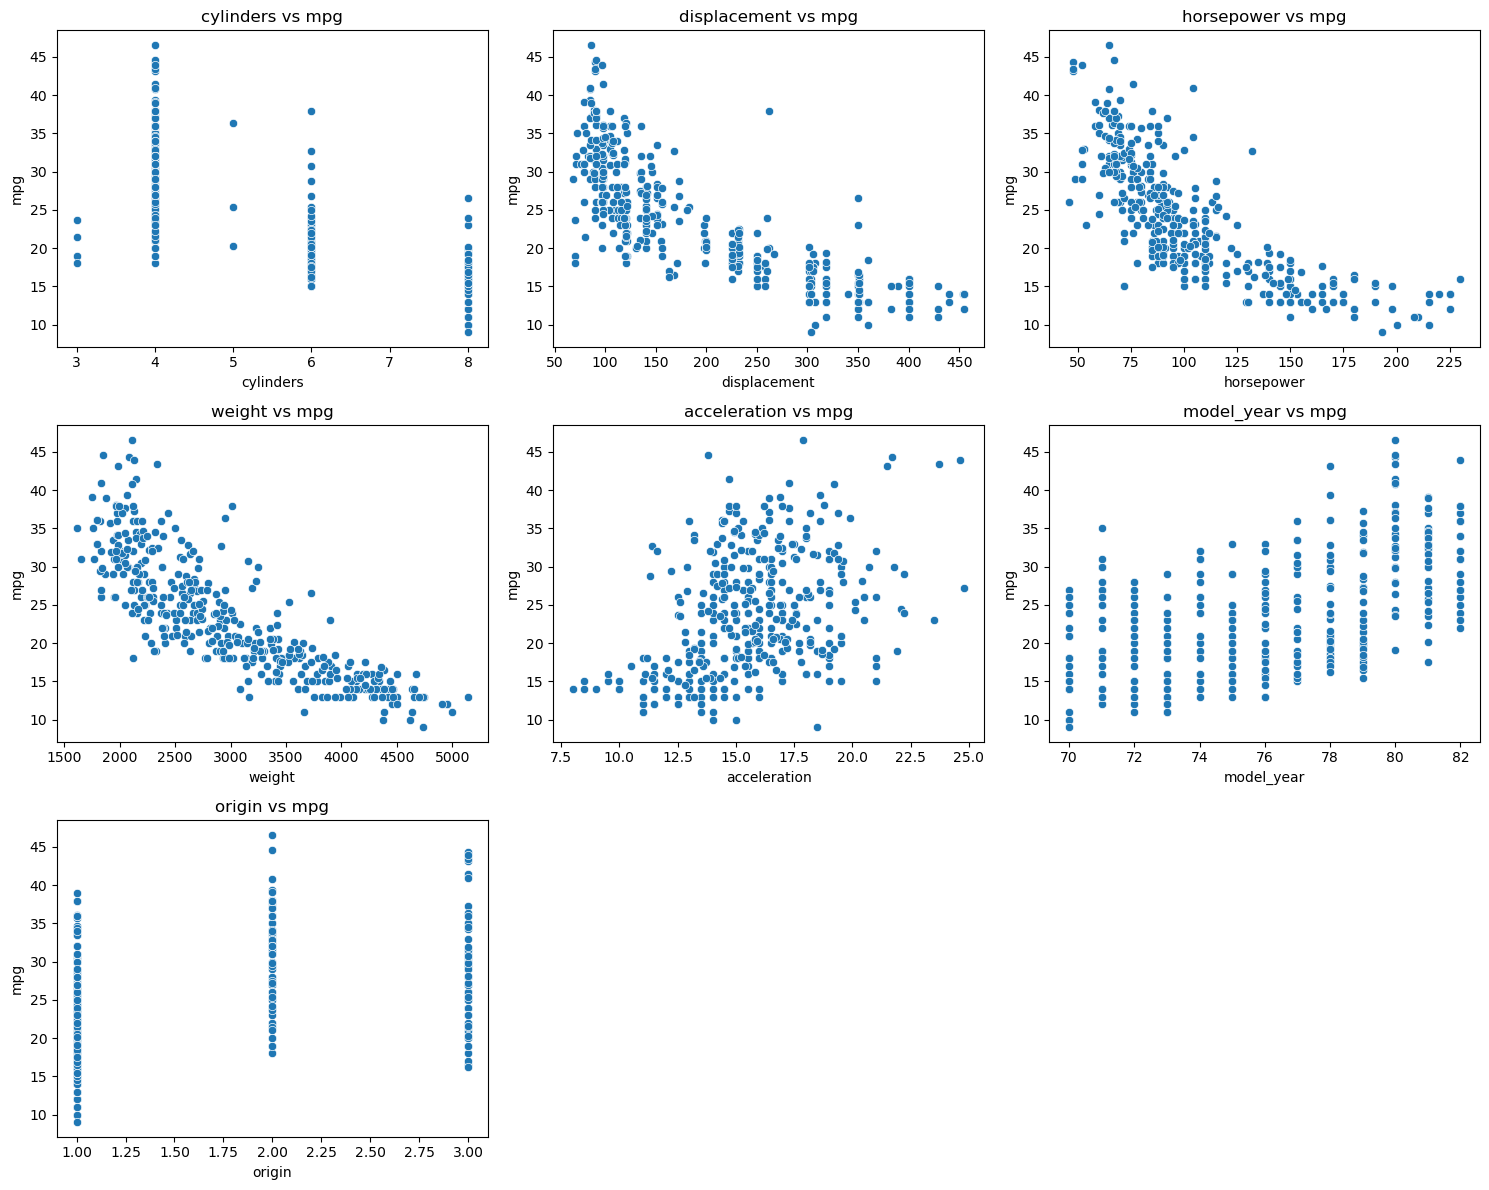

In [272]:

# Set up the plot grid
plt.figure(figsize=(15, 12))

# Loop through features and create subplots
for idx, feature in enumerate(features):
    plt.subplot(3, 3, idx + 1)
    sns.scatterplot(x=feature, y='mpg', data=df)
    plt.title(f"{feature} vs mpg")

plt.tight_layout()
plt.show()


## Interpreting the Scatter plot Visually for Linear or Non Linear patttern 

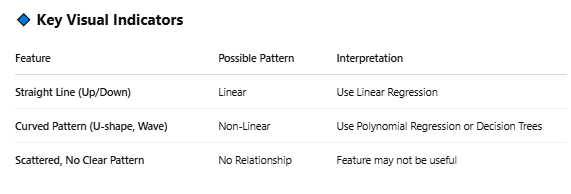

## Hence it conflicts with the very first assumption we conclude that the  data folows a NonLinear pattern

In [277]:
# 3) Train Model on Linear Regression and Determine r2scores
# Define feature variables (X) - Excluding the target column
X = df

In [279]:
# Define target variable (y)
y = df['mpg']  # Target column

In [281]:
# Step 1: Check for NaNs or infinite values
print("NaNs in features:\n", X.isnull().sum())

NaNs in features:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [283]:
# Replace NaN values in the 'horsepower' column with its mean
X['horsepower'].fillna(X['horsepower'].mean(), inplace=True)

# Verify if missing values are replaced
print(X.isnull().sum())  # Should print 0 for all columns


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


C:\Users\bhosa\AppData\Local\Temp\ipykernel_4440\3710046060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['horsepower'].fillna(X['horsepower'].mean(), inplace=True)


In [285]:
X = df.drop(columns = "mpg")

In [287]:
## Spliting X and y in train and test split
from sklearn.model_selection import train_test_split


# Split the dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [289]:
#Applying Linear Reression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [291]:
y_pred = model.predict(X_test)

In [293]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [295]:
# 5️⃣ Print Performance Metrics
print("Linear regression Mterics")
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Linear regression Mterics
R² Score: 0.8345
Mean Absolute Error (MAE): 2.5226
Mean Squared Error (MSE): 9.4973
Root Mean Squared Error (RMSE): 3.0818


In [247]:
## Applying Polynomia regression Model
from sklearn.preprocessing import PolynomialFeatures
# Define Polynomial Features (Degree = 2 for quadratic relationships)
poly = PolynomialFeatures(degree=2)  # You can try degree=3 for more complexity

In [249]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [251]:
# Train the Linear Regression Model on Polynomial Features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [253]:
y_pred = model.predict(X_test_poly)

In [255]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [257]:
print(f"Polynomial Regression (Degree=2) Results:")
print(f"R² Score: {r2:.4f}")  # Higher is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Polynomial Regression (Degree=2) Results:
R² Score: 0.8792
Mean Absolute Error (MAE): 1.9241
Mean Squared Error (MSE): 6.9309
Root Mean Squared Error (RMSE): 2.6327


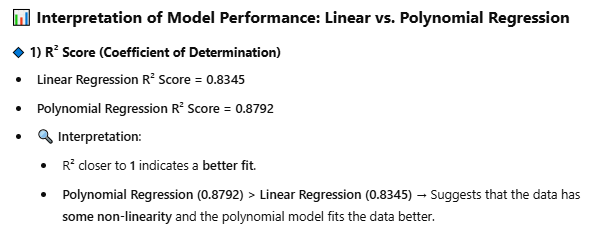
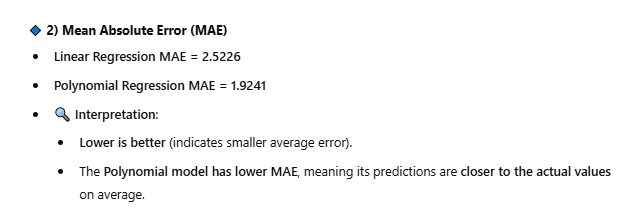
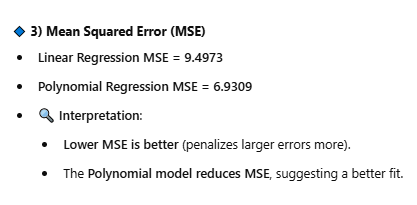
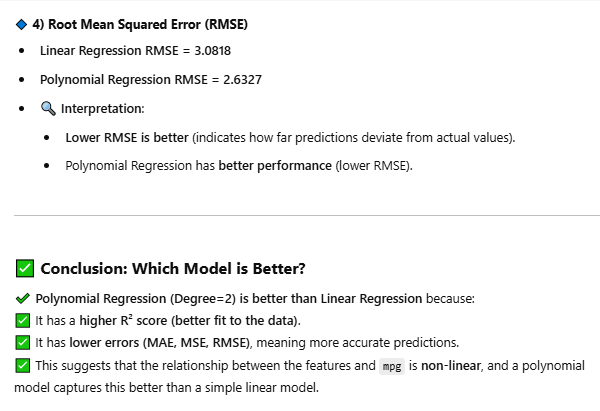

In [260]:
# Define Polynomial Features (Degree=3)
poly3 = PolynomialFeatures(degree=3)

# Transform the features
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# Train the Linear Regression model on Polynomial Features
model3 = LinearRegression()
model3.fit(X_train_poly3, y_train)

# Make Predictions
y_pred_poly3 = model3.predict(X_test_poly3)

# Evaluate the Model
r2_poly3 = r2_score(y_test, y_pred_poly3)
mae_poly3 = mean_absolute_error(y_test, y_pred_poly3)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
rmse_poly3 = mse_poly3 ** 0.5


In [262]:
# Print Performance Metrics
print(f"Polynomial Regression (Degree=3) Results:")
print(f"R² Score: {r2_poly3:.4f}")  # Higher is better
print(f"Mean Absolute Error (MAE): {mae_poly3:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly3:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly3:.4f}")

Polynomial Regression (Degree=3) Results:
R² Score: 0.5149
Mean Absolute Error (MAE): 3.3638
Mean Squared Error (MSE): 27.8430
Root Mean Squared Error (RMSE): 5.2766


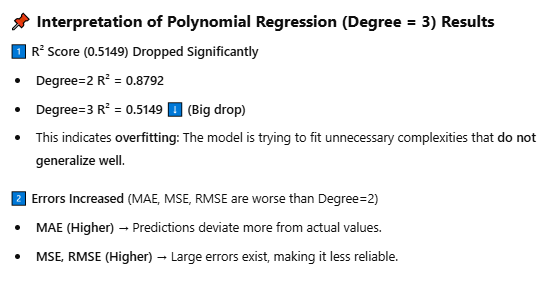
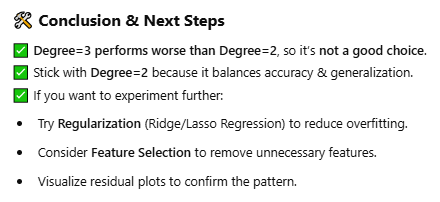